Get Yearly Total NSF Grant Awards, Plot them as time series Data

In [1]:
import xml.etree.cElementTree as ET
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import re

In [2]:
!ls */*.xml

/bin/sh: /bin/ls: Argument list too long


In [3]:
!cat xmlToCSV.py

import xml.etree.cElementTree as ET
import csv
import sys


# open a file for writing

Output = open('Output.csv', 'w')
csvwriter = csv.writer(Output)
header = ['Award', 'Division', 'First Name', 'Last Name', 'Institution', 'State']
csvwriter.writerow(header)
count = 0
for file in sys.argv:
    print file
    if(count==0):
        count+=1
        continue
    output_array = []
    tree = ET.ElementTree(file=file)
    for elem in tree.iter('AwardAmount'):
            Award = elem.text
    output_array.append(Award)
    for elem in tree.iter('Division'):
        for sub in elem.iter('LongName'):
            Division = sub.text
    output_array.append(Division)
    for elem in tree.iter('Investigator'):
        for sub in elem.iter('FirstName'):
            FirstName = sub.text
        for sub in elem.iter('LastName'):
            LastName = sub.text
    output_array.append(FirstName)
    output_array.append(LastName)
    for elem in tree.iter('Institution'):
        for sub in elem.iter

!for i in `ls -d */`;
    do echo \$i;
    python  xmlToCSV.py \$i/*.xml;
    mv Output.csv \$i;
done

a few of these are too long and require piping ls to a file, then reading the file for arguments to write from.

A few of them required editing out nonstandard characters, about 5 files total.

In [4]:
!ls */*.csv

1959/Output.csv 1972/Output.csv 1984/Output.csv 1996/Output.csv 2008/Output.csv
1961/Output.csv 1973/Output.csv 1985/Output.csv 1997/Output.csv 2009/Output.csv
1962/Output.csv 1974/Output.csv 1986/Output.csv 1998/Output.csv 2010/Output.csv
1963/Output.csv 1975/Output.csv 1987/Output.csv 1999/Output.csv 2011/Output.csv
1964/Output.csv 1976/Output.csv 1988/Output.csv 2000/Output.csv 2012/Output.csv
1965/Output.csv 1977/Output.csv 1989/Output.csv 2001/Output.csv 2013/Output.csv
1966/Output.csv 1978/Output.csv 1990/Output.csv 2002/Output.csv 2014/Output.csv
1967/Output.csv 1979/Output.csv 1991/Output.csv 2003/Output.csv 2015/Output.csv
1968/Output.csv 1980/Output.csv 1992/Output.csv 2004/Output.csv 2016/Output.csv
1969/Output.csv 1981/Output.csv 1993/Output.csv 2005/Output.csv 2017/Output.csv
1970/Output.csv 1982/Output.csv 1994/Output.csv 2006/Output.csv
1971/Output.csv 1983/Output.csv 1995/Output.csv 2007/Output.csv


In [5]:
directories = range(1961, 2017)

In [6]:
dataDict = {}

for directory in directories:
    fstring = str(directory) + "/Output.csv"
    data = pd.read_csv(fstring)
    dataDict[directory] = data

In [7]:
#check to make sure each dataframe has an appropriate number of frames.
#for directory in dataDict.keys():
#    print directory, dataDict[directory].shape

<Container object of 56 artists>

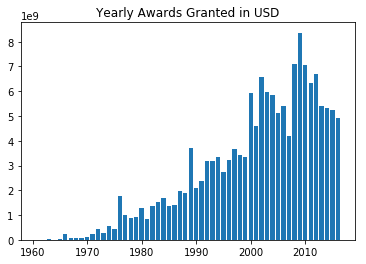

In [8]:
#find the yearly total of each year.
i=0
xvals = np.zeros(len(list(dataDict.keys())))
yvals = np.zeros(len(list(dataDict.keys())))
for directory in dataDict.keys():
    xvals[i] = directory
    yvals[i] = np.sum(dataDict[directory].Award)
    #print directory, yvals[i]
    i=i+1
import pylab
pylab.title("Yearly Awards Granted in USD")
pylab.bar( xvals, yvals)

<Container object of 56 artists>

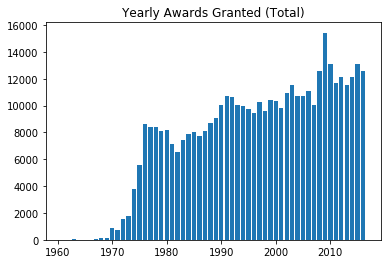

In [9]:
i=0
xvals = np.zeros(len(list(dataDict.keys())))
yvals = np.zeros(len(list(dataDict.keys())))
for directory in dataDict.keys():
    xvals[i] = directory
    yvals[i] = dataDict[directory].shape[0]
    #print directory, yvals[i]
    i=i+1
import pylab
pylab.title("Yearly Awards Granted (Total)")
pylab.bar( xvals, yvals)

<Container object of 56 artists>

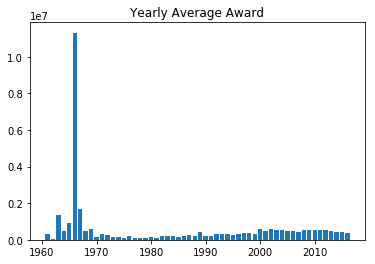

In [10]:
i=0
xvals = np.zeros(len(list(dataDict.keys())))
yvals = np.zeros(len(list(dataDict.keys())))
for directory in dataDict.keys():
    xvals[i] = directory
    summation = np.sum(dataDict[directory].Award)
    yvals[i] = float(summation) / dataDict[directory].shape[0]
    #print directory, yvals[i]
    i=i+1
pylab.title("Yearly Average Award")
pylab.bar( xvals, yvals)

<Container object of 56 artists>

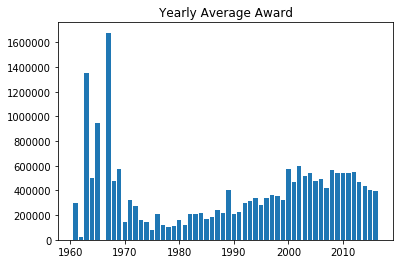

In [11]:
#splice out the abnormally high value
yvals[5] = 0
pylab.title("Yearly Average Award")
pylab.bar( xvals, yvals)

<Container object of 25 artists>

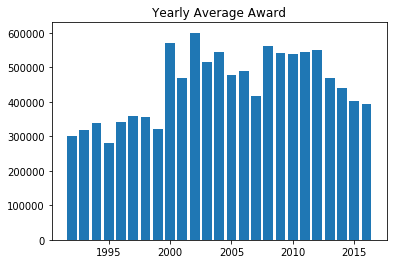

In [12]:
#look at the last 25 years
yvals[5] = 0
pylab.title("Yearly Average Award")
pylab.bar( xvals[-25:], yvals[-25:])

<Container object of 56 artists>

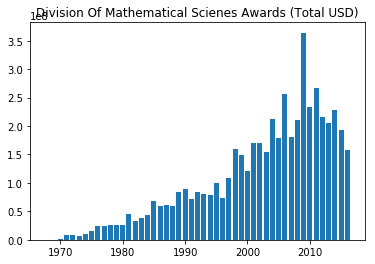

In [13]:
#can i see the average/total award for mathematical sciences?
#Division of mathematical sciences
i=0
xvals = np.zeros(len(list(dataDict.keys())))
yvals = np.zeros(len(list(dataDict.keys())))
for directory in dataDict.keys():
    xvals[i] = directory
    summation = np.sum(dataDict[directory].Award[dataDict[directory].Division == 'Division Of Mathematical Sciences'])
    yvals[i] = float(summation)# / dataDict[directory].shape[0]
    #print directory, yvals[i]
    i=i+1
pylab.title("Division Of Mathematical Scienes Awards (Total USD)")
pylab.bar( xvals, yvals)

In [14]:
for i in range(len(yvals)):
    print xvals[i], yvals[i]

1961.0 nan
1962.0 nan
1963.0 nan
1964.0 nan
1965.0 nan
1966.0 nan
1967.0 nan
1968.0 0.0
1969.0 284200.0
1970.0 1239855.0
1971.0 8175000.0
1972.0 8180673.0
1973.0 6362900.0
1974.0 9532257.0
1975.0 16051138.0
1976.0 24515093.0
1977.0 24836766.0
1978.0 26645066.0
1979.0 25398269.0
1980.0 25795703.0
1981.0 46054457.0
1982.0 33705492.0
1983.0 37780853.0
1984.0 42822435.0
1985.0 68750799.0
1986.0 59468693.0
1987.0 60720689.0
1988.0 59799912.0
1989.0 84113808.0
1990.0 89293925.0
1991.0 71536411.0
1992.0 84686342.0
1993.0 79949575.0
1994.0 78281228.0
1995.0 99008008.0
1996.0 74159276.0
1997.0 108955388.0
1998.0 160118194.0
1999.0 148841352.0
2000.0 121718835.0
2001.0 170842479.0
2002.0 169477605.0
2003.0 153622858.0
2004.0 213118154.0
2005.0 178112669.0
2006.0 257157513.0
2007.0 181364013.0
2008.0 211133145.0
2009.0 364111838.0
2010.0 232756048.0
2011.0 266841990.0
2012.0 215153133.0
2013.0 205424234.0
2014.0 227979501.0
2015.0 192938638.0
2016.0 157475398.0


<Container object of 49 artists>

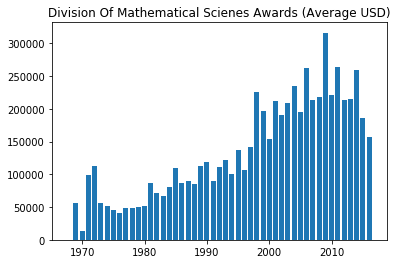

In [15]:
#can i see the average/total award for mathematical sciences?
#Division of mathematical sciences
i=0
j=0 #counter for number of years w/o data
xvals = np.zeros(len(list(dataDict.keys())))
yvals = np.zeros(len(list(dataDict.keys())))
for directory in dataDict.keys():
    xvals[i] = directory
    summation = np.sum(dataDict[directory].Award[dataDict[directory].Division == 'Division Of Mathematical Sciences'])
    divisor = dataDict[directory].Award[dataDict[directory].Division == 'Division Of Mathematical Sciences'].shape[0]
    #print divisor
    if divisor == 0:
        j+=1
        continue
        
    yvals[i] = float(summation) / divisor
    #print directory, yvals[i]
    i=i+1
pylab.title("Division Of Mathematical Scienes Awards (Average USD)")
pylab.bar( xvals[:-j], yvals[:-j])

In [33]:
#now, can i get the slope of these values, and make a naieve prediction for the average award in say 2030?
p, res, _, _, _ = np.polyfit(np.arange(len(yvals[:-j])), yvals[:-j], 2, full=True)
print p
f = np.poly1d(p)
predictAverage = f(len(yvals) + (2030-2016))
print predictAverage

[  1.80225063e+01   3.91819963e+03   2.52901297e+04]
387874.385087


In [38]:
institutions = collections.defaultdict(int)
for directory in directories:
    institutionByYear = collections.Counter(list(dataDict[directory].Institution))
    for key in institutionByYear:
        institutions[key] += institutionByYear[key]

In [37]:
institutions['University of Minnesota Saint Paul']

338

In [45]:
i=0
top100 = {}
for key in institutions.keys():
    if institutions[key] > 1000:
        top100[key] = institutions[key]
        
top100

{'Arizona State University': 3182,
 'Brown University': 2327,
 'California Institute of Technology': 2787,
 'Carnegie-Mellon University': 3485,
 'Case Western Reserve University': 1375,
 'Clemson University': 1039,
 'Colorado State University': 2131,
 'Columbia University': 4381,
 'Cornell University': 4756,
 'Dartmouth College': 1102,
 'Drexel University': 1058,
 'Duke University': 2970,
 'Fellowships': 1487,
 'Florida State University': 1644,
 'Georgia Tech Research Corporation': 3770,
 'Gordon Research Conferences': 1077,
 'Harvard University': 3668,
 'Indiana University': 2972,
 'Individual Award': 2877,
 'Iowa State University': 2077,
 'Johns Hopkins University': 2708,
 'Kansas State University': 1030,
 'Lehigh University': 1085,
 'Louisiana State University & Agricultural and Mechanical College': 1609,
 'Massachusetts Institute of Technology': 5756,
 'Michigan State University': 3058,
 'National Academy of Sciences': 1232,
 'National Bureau of Economic Research Inc': 1005,
 'New 

In [ ]:
top100Predictions = {}
for inst in top100.keys():
    if inst=='Fellowships' or inst=='Individual Award' or inst=='Travel Award':
        continue
    

In [81]:
#can i see the average/total award for mathematical sciences?
#Division of mathematical sciences
predictAverage = {}
predictionYear = 2030
for institution in top100.keys():
    i=0
    j=0 #counter for number of years w/o data
    xvals = np.zeros(len(list(dataDict.keys())))
    yvals = np.zeros(len(list(dataDict.keys())))
    if institution=='Fellowships' or institution=='Individual Award' or institution=='Travel Award':
        continue
    
    for directory in dataDict.keys():
        xvals[i] = directory
        summation = np.sum(dataDict[directory].Award[dataDict[directory].Institution == institution])
        divisor = dataDict[directory].Award[dataDict[directory].Institution == institution].shape[0]
        #print divisor
        if divisor == 0:
            j+=1
            continue
        
        yvals[i] = float(summation) / divisor
        #print directory, yvals[i]
        i=i+1
#now, can i get the slope of these values, and make a naieve prediction for the average award in say 2030?
    p, res, _, _, _ = np.polyfit(np.arange(len(yvals[:-j])), yvals[:-j], 2, full=True)
    #print p
    f = np.poly1d(p)
    predictAverage[institution] = f(len(yvals) + (predictionYear-2016))
    #print institution, predictAverage[institution]

In [82]:
i=0
print "Predictions for %s:" %predictionYear
for inst, prediction in sorted(predictAverage.items(), key=lambda(k,v): v, reverse=True):
    if(np.isnan(prediction)):
        continue
    if(i<10):
        i+=1
        print "%s) %s : %i" % (i, inst, int(prediction))

Predictions for 2030:
1) Texas A&M Research Foundation : 581783477
2) University of Washington : 3311538
3) New York University : 3236705
4) University of Alaska Fairbanks Campus : 2049740
5) Vanderbilt University : 2965736
6) University of Colorado at Boulder : 2364317
7) University of California-Berkeley : 2124555
8) Ohio State University : 1928947
9) University of Tennessee Knoxville : 1503391
10) University of Georgia Research Foundation Inc : 1488156
